In [ ]:
from get_true_bvs import *
from clusters import *
from get_track_density import *
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from scipy.stats import linregress
from get_track_density import *

In [4]:
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300
plt.rcParams["figure.figsize"] = [3, 3]
plt.rcParams['font.size'] = 12

In [5]:
bvs=get_true_bvs()
cluster_labels, cluster_centers, cluster_names, sub_cix, clust_bvs=read_clusters(bvs)

reading cluster data from /gws/nopw/j04/forsea/users/jcrook/BorneoVortex/Clusters/
[1 2 3 4 5]
cluster that was subclustered is 0


In [6]:
years = np.array([ bv.track_times[0].year for bv in bvs ])

In [7]:
dic = {clust_bvs[n] : cluster_labels[n] for n in np.arange(0,585)}

In [8]:
nborneo = [bv for bv, label in dic.items() if label == 1]
scs = [bv for bv, label in dic.items() if label == 2]
cshaped = [bv for bv, label in dic.items() if label == 3]
wborneo = [bv for bv, label in dic.items() if label == 4]
nwborneo = [bv for bv, label in dic.items() if label == 5]

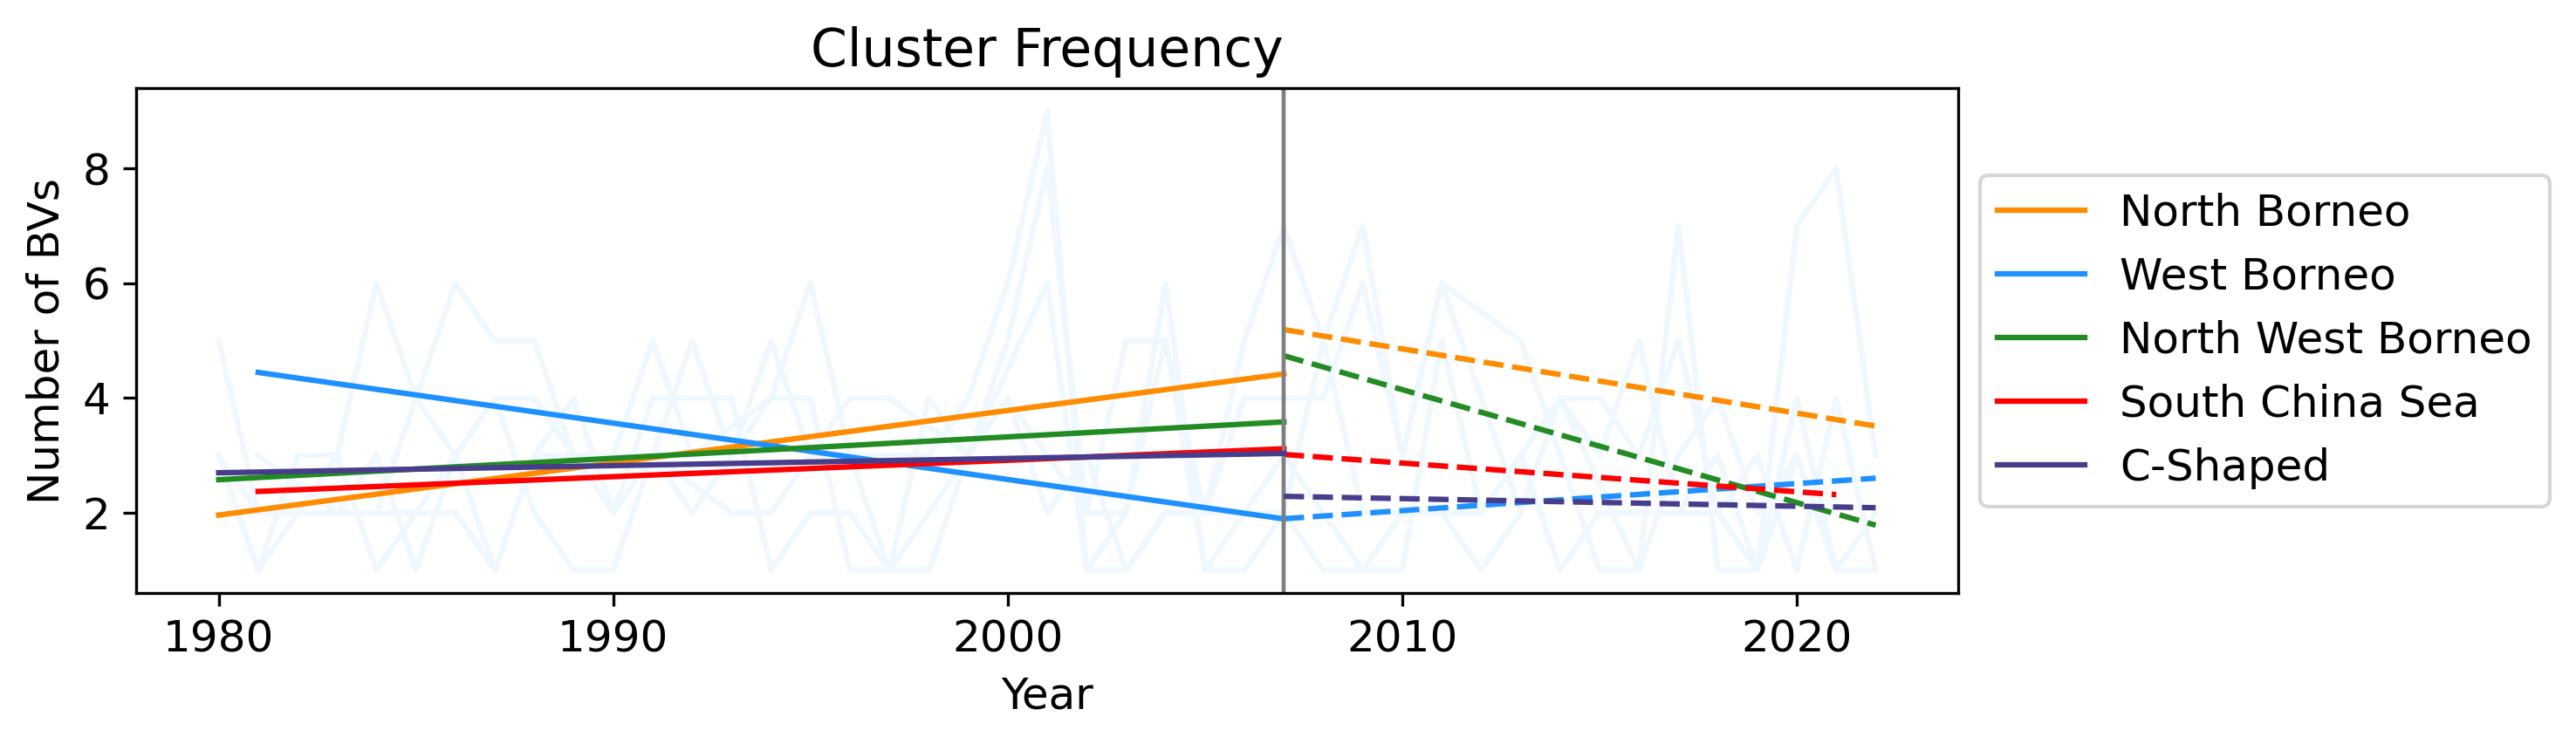

In [10]:
titles = ['North Borneo', 'West Borneo', 'North West Borneo','South China Sea', 'C-Shaped']
colors = ['darkorange','dodgerblue','forestgreen', 'red','darkslateblue']
fig, ax = plt.subplots(1,1,figsize=(10,3))

for type, title, color in zip([nborneo, wborneo, nwborneo, scs, cshaped], titles, colors) :
    years = np.array([type[n].track_times[0].year for n in np.arange(0,len(type))])
    year, counts = np.unique(years, return_counts=True)
    
    
    ax.set(xlabel='Year', ylabel='Number of BVs', title='Cluster Frequency')
    ax.plot(year, counts, color='aliceblue', zorder=0)
    
    coef = np.polyfit(year, counts, 1)

    trendline = np.poly1d(coef)
    plt.axvline(x = 2007, color = 'grey', linewidth =1)
    
    coef = np.polyfit(year[year <= 2007], counts[year <= 2007],1)
    p = np.poly1d(coef)
    ax.plot(year[year <= 2007], p(year[year <= 2007]), color=color, label = title)
    
    coef = np.polyfit(year[year >= 2007], counts[year >= 2007],1)
    p = np.poly1d(coef)
    ax.plot(year[year >= 2007], p(year[year >= 2007]), linestyle ='--', color=color)
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    fig.tight_layout()
    
plt.savefig('plots/bvfreq')

In [15]:
def plotting(type, title):

    vorticity = []
    latitude = []
    longitude = []
    
    years = np.array([type[n].track_times[0].year for n in np.arange(0,len(type))])
    year, counts = np.unique(years, return_counts=True)
    
    for n in np.arange(0,len(type)):
        vorticity.append(np.mean(type[n].vort_data[2]))
        longitude.append(np.mean(type[n].vort_data[0]))
        latitude.append(np.mean(type[n].vort_data[1]))
    
    yearlyvort = []
    yearlylon = []
    yearlylat = []
    
    current_index = 0
    
    for length in counts:
        
        yearlyvort.append(np.mean(vorticity[current_index:current_index + length]))
        yearlylon.append(np.mean(longitude[current_index:current_index + length]))
        yearlylat.append(np.mean(latitude[current_index:current_index + length]))
            
        current_index += length
    
    y = ['Vorticity', 'Longitude','Latitude']
    
    for n, yax in zip([yearlyvort, yearlylon, yearlylat], y):
        
        fig, ax = plt.subplots(figsize=(8,3))
        ax.set_xlabel('Year')
        ax.set_ylabel(yax)
        ax.set_title(title)
        ax.plot(year, n, color='darkseagreen')

        coef = np.polyfit(year[:28],  n[:28],1)
        p = np.poly1d(coef)
        ax.plot(year[:28], p(year[:28]),linestyle='-', color ='forestgreen')
        
        coef = np.polyfit(year[27:],  n[27:],1)
        p = np.poly1d(coef)
        ax.plot(year[27:], p(year[27:]), color='forestgreen', linestyle='--')
        ax.axvline(x = 2007, color = 'grey', linewidth=1)

        print(linregress(year,n))
        
        # coef = np.polyfit(year, n,1)
        # p = np.poly1d(coef)
        # ax.plot(year, p(year), linestyle ='-', color= 'forestgreen')
        

In [10]:
def monthlyfreq(type):

    time = [type[n].track_times[0] for n in np.arange(0,len(type))]
    
    jan = [date for date in time if date.month == 1]
    feb = [date for date in time if date.month == 2]
    mar = [date for date in time if date.month == 3]
    oct = [date for date in time if date.month == 10]
    nov = [date for date in time if date.month == 11]
    dec = [date for date in time if date.month == 12]

    for mon, title in zip([jan, feb, mar, oct, nov, dec], ['January','February','March', 'October', 'November', 'December']):
            
        month, counts = np.unique([mon[n].year for n in range(0,len(mon))], return_counts = True)

        fig, ax = plt.subplots(figsize=(8,3))
        ax.set_xlabel('Year')
        ax.set_ylabel('Number of BVs')
        ax.set_title(title)
        ax.plot(month, counts)
            
        coef = np.polyfit(month, counts,1)
        p = np.poly1d(coef)
        ax.plot(month, p(month), linestyle ='-')

In [ ]:
plotting(wborneo, 'West Borneo')